<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/02-Machine-Learning/notebooks/07-Clasificacion-Otros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Otros clasificadores

<h2>Árboles de decisión, Vecinos más cercanos, Random Forest y Regresión Logística</h2>

A lo largo de esta notebook compararemos varios clasificadores, viendo su funcionamiento en un dataset artificial y uno real. Además, veremos atributos y métodos importantes de cada uno.

Veremos:

* Árboles de decisión
* Bosques aleatorios
* Vecinos más cercanos
* Regresión Logística

En cada uno de los clasificadores experimentaremos con algunos de sus hiperparámetros principales y derivaremos conclusiones usando los atributos de los modelos entrenados

---

Recuerda la simbología de las notebooks:

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

## Los datasets

### 1. Dataset linealmente separable

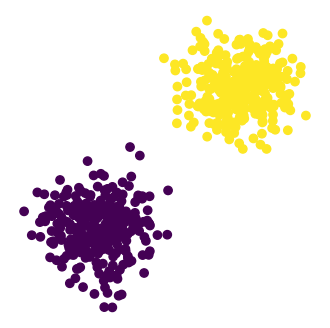

In [92]:
#@title Conjunto de datos
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=600,centers=2,random_state=31)

theta = np.pi/4 # Ángulo de rotación
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # Matriz de rotación

Xr = np.transpose(R@np.transpose(X)) # Rotamos el dataset

idxs = np.where(y==1)[0]   # Obtenemos los índices donde y=1

Xr[idxs,:] = Xr[idxs,:] + np.array([-1,-2])

X1, y1 = Xr, y

plt.figure(figsize=(4,4))
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.axis('off')
plt.axis('equal')
plt.show()

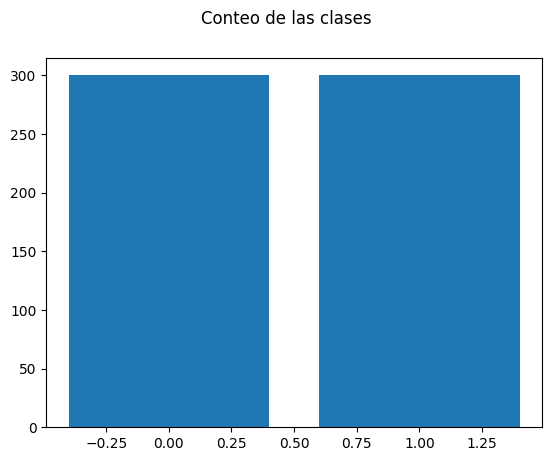

In [93]:
import matplotlib.pyplot as plt
import numpy as np

labels, counts = np.unique(y1,return_counts=True)

plt.figure()
plt.bar(labels,counts)
plt.suptitle(f"Conteo de las clases")
plt.show()

### MNIST lite

Esta versión del dataset MNIST solamente tiene 1797 imágenes y cada imagen es de $8\times 8$.

Tamaño del dataset: (1797, 64)


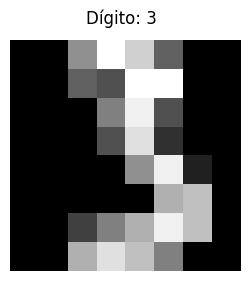

In [94]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

X_mnist = digits.data
y_mnist = digits.target

print(f"Tamaño del dataset: {X_mnist.shape}")

idx = 45
plt.figure(figsize=(3,3))
plt.imshow(X_mnist[idx].reshape(8,8),cmap='gray')
plt.suptitle(f"Dígito: {y_mnist[idx]}")
plt.axis('off')
plt.show()

Veamos el balanceo de las clases:

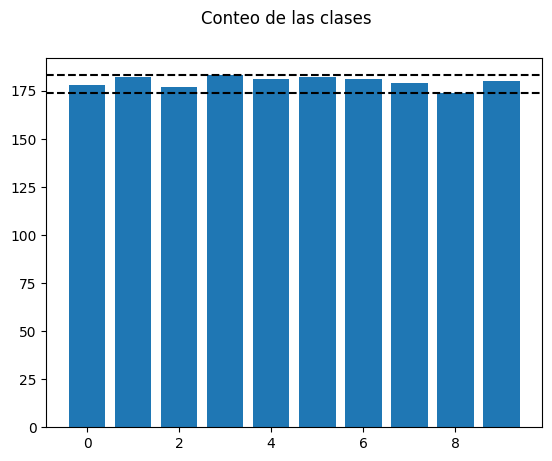

In [95]:
import matplotlib.pyplot as plt
import numpy as np

labels, counts = np.unique(y_mnist,return_counts=True)

min, max = np.min(counts), np.max(counts)

plt.figure()
plt.bar(labels,counts)
plt.axhline(min,color='black',linestyle='--')
plt.axhline(max,color='black',linestyle='--')
plt.suptitle(f"Conteo de las clases")
plt.show()

## Clasificador 1: Árboles de decisión

En esta notebook usaremos el clasificador [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn.

Primero, observaremos algunas caracteristicas generales del método y después, lo usaremos en un problema de clasificación con un dataset clásico del machine learning.





El módulo `dtreeviz` es útil para la visualización de árboles de decisión y la interpretación de modelos ([documentación](https://github.com/parrt/dtreeviz)).

In [96]:
!pip install -qq dtreeviz

### Ejemplo 1: Ejemplo ilustrativo con datos linealmente separables

Con este ejemplo, exploraremos el uso básico del álgoritmo y observaremos las características y particularidades del clasificador DT.

Retomamos el dataset

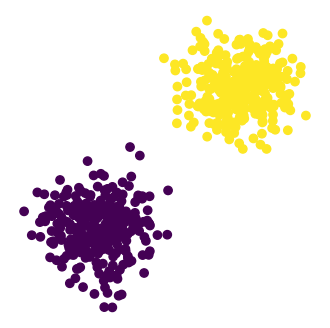

In [97]:
plt.figure(figsize=(4,4))
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.axis('off')
plt.axis('equal')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=101) # 70% training and 30% test

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 420
Tamaño del conjunto de prueba: 180


#### Entrenamiento y evaluación

In [99]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Dados que los datos siguen siendo linealmente separables, seguimos obteniendo el 100% en todas las métricas.

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


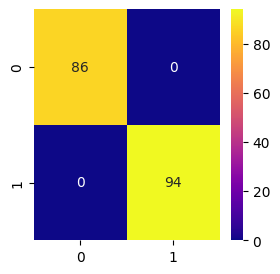

In [100]:
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

#### Visualización del árbol

Veamos el árbol de decisión usando [`export_text`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) del módulo `tree` de scikit-learn.

In [101]:
from sklearn.tree import export_text

text_representation = export_text(decision_tree=clf,feature_names=['x','y'])
print(text_representation)

|--- y <= 6.32
|   |--- class: 0
|--- y >  6.32
|   |--- x <= -7.61
|   |   |--- class: 0
|   |--- x >  -7.61
|   |   |--- class: 1



Visualicemos la frontera de decisión usando [`DecisionBoundaryDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

La frontera de decisión podría no ser la que esperaríamos:

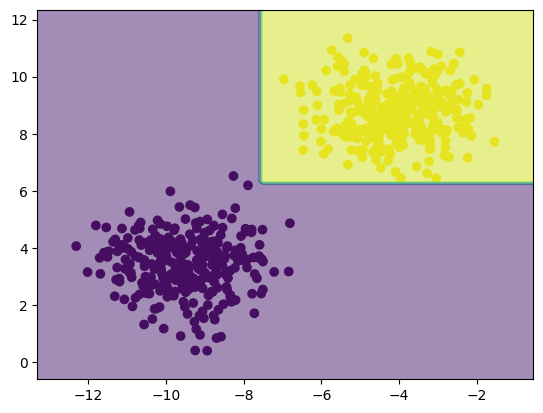

In [102]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], c=y1) # Hacemos el scatter con los puntos que queremos mostrar
DecisionBoundaryDisplay.from_estimator(clf, X1,
                                      ax=ax, alpha=0.5) # Mostramos la frontera de decisión encima
ax.axis('off')
plt.show()

Como podemos ver, este clasificador no separa con una línea en general, aún si los datos son linealmente separables. **Los árboles de decisión obtienen una FD compuesta de segmentos de línea verticales y horizontales.**

#### Efecto de perturbaciones

Ahora, observemos el efecto de perturbar levemente el conjunto de datos. ¿Qué le pasa al arbol de decisión?

Este tipo de perturbaciones pueden ocurrir como resultado de errores de medición o de la presencia de outliers.

Movemos un par de puntos cerca de la FD.

**Conclusión:** Un árbol de decisión es sensible a outliers y ruido.

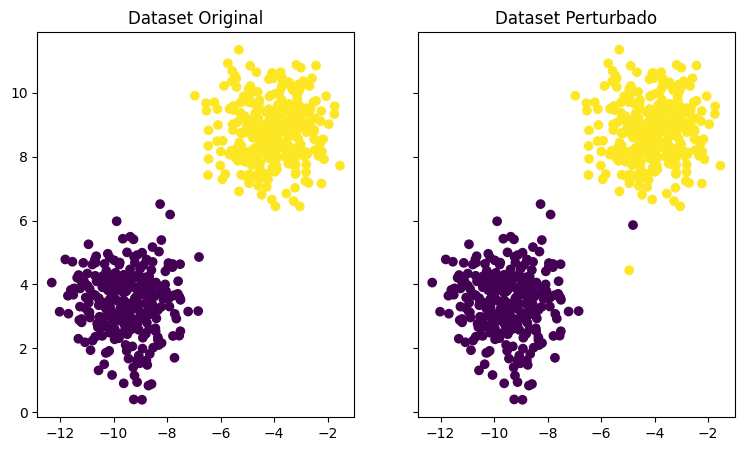

In [103]:
#@title Dataset con perturbación

Xrp = X1.copy()
Xrp[192] = Xrp[192] + np.array([-1,-2])
Xrp[486] = Xrp[486] + np.array([2,1])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(Xr[:,0],Xr[:,1],c=y1)
axs[0].set_title("Dataset Original")
axs[1].scatter(Xrp[:,0],Xrp[:,1],c=y1)
axs[1].set_title("Dataset Perturbado")
fig.show()

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xrp, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.994
Recall: 0.98936
Precision: 1.0


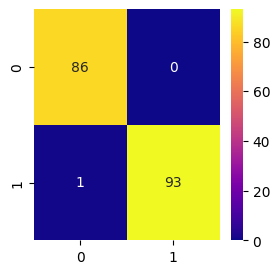

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [106]:
from sklearn.tree import export_text

text_representation = export_text(decision_tree=clf,feature_names=['x','y'])
print(text_representation)

|--- y <= 6.59
|   |--- x <= -5.90
|   |   |--- class: 0
|   |--- x >  -5.90
|   |   |--- x <= -4.88
|   |   |   |--- class: 1
|   |   |--- x >  -4.88
|   |   |   |--- class: 0
|--- y >  6.59
|   |--- class: 1



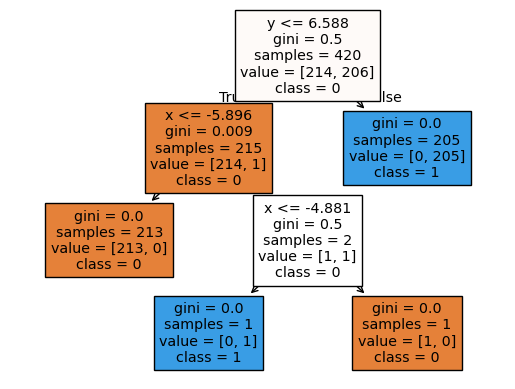

In [107]:
from sklearn.tree import plot_tree

fig = plt.figure()   # Definimos una figura más grande para que quepa
_ = plot_tree(clf, feature_names=['x','y'],
                   class_names=['0','1'],
                   filled=True)

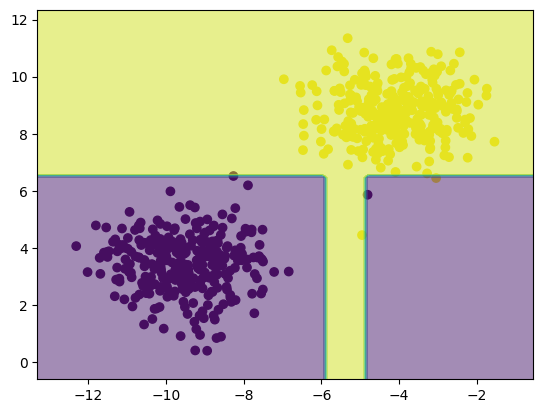

In [108]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
ax.scatter(Xrp[:, 0], Xrp[:, 1], c=y1) # Hacemos el scatter con los puntos que queremos mostrar
DecisionBoundaryDisplay.from_estimator(clf, Xrp,
                                      ax=ax, alpha=0.5) # Mostramos la frontera de decisión encima
plt.show()

### Ejemplo 2: MNIST

In [109]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

Veamos los rangos de las variables

In [110]:
import pandas as pd
import numpy as np

print(f"Máximo: {np.max(X)}, Mínimo: {np.min(X)}")
pd.DataFrame(X).describe()

Máximo: 16.0, Mínimo: 0.0


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Entrenemos el modelo sin normalizar

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [112]:
print(f"Accuracy entrenamiento: {clf.score(X_train,y_train)}")
print(f"Accuracy prueba: {clf.score(X_test,y_test)}")

Accuracy entrenamiento: 1.0
Accuracy prueba: 0.8462962962962963


Veamos otra herramienta de evaluación en la clasificación: La función [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), que muestra un reporte de varias métricas de clasificación en cada una de las etiquetas, además de varios promedios.

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.84      0.84      0.84        55
           2       0.71      0.86      0.78        49
           3       0.83      0.83      0.83        54
           4       0.88      0.84      0.86        61
           5       0.93      0.86      0.89        59
           6       0.89      0.91      0.90        46
           7       0.82      0.89      0.85        56
           8       0.77      0.69      0.73        59
           9       0.86      0.79      0.83        48

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540



Viendo las métricas, ¿hay señales de *overfitting*?

Accuracy: 0.826
Recall: 0.825
Precision: 0.829


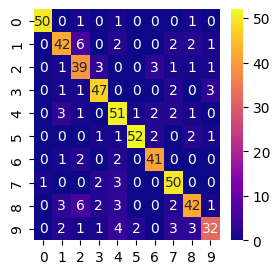

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Veamos el árbol de decisión

In [79]:
from sklearn import tree

from sklearn.tree import export_text

text_representation = export_text(decision_tree=clf,feature_names=[f'pixel_{j+1}' for j in range(X.shape[1])])
print(text_representation)

|--- pixel_37 <= 0.50
|   |--- pixel_34 <= 0.50
|   |   |--- pixel_22 <= 6.00
|   |   |   |--- pixel_19 <= 10.50
|   |   |   |   |--- pixel_62 <= 14.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- pixel_62 >  14.00
|   |   |   |   |   |--- class: 6
|   |   |   |--- pixel_19 >  10.50
|   |   |   |   |--- class: 5
|   |   |--- pixel_22 >  6.00
|   |   |   |--- pixel_43 <= 9.00
|   |   |   |   |--- class: 9
|   |   |   |--- pixel_43 >  9.00
|   |   |   |   |--- pixel_51 <= 14.00
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- pixel_51 >  14.00
|   |   |   |   |   |--- class: 2
|   |--- pixel_34 >  0.50
|   |   |--- pixel_7 <= 1.50
|   |   |   |--- pixel_14 <= 1.50
|   |   |   |   |--- pixel_34 <= 6.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- pixel_34 >  6.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- pixel_14 >  1.50
|   |   |   |   |--- pixel_29 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pixel_29 >  4.50
|   |   |   |   |   |--- 

Veamos la profundidad del árbol

In [80]:
print(f"Profundidad del árbol: {clf.get_depth()}")

Profundidad del árbol: 13


Analicemos el comportamiento del *accuracy* en términos de la profundidad máxima

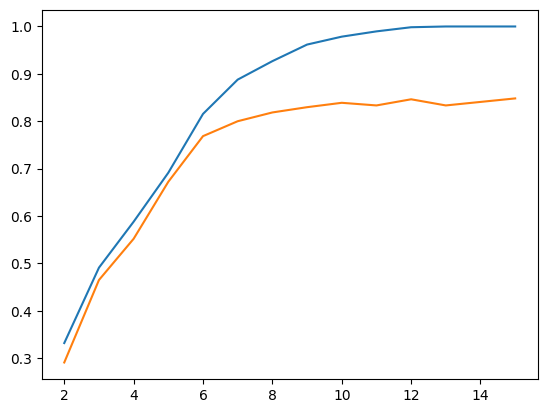

In [81]:
depths = list(range(2,16))

accs_train = []
accs_test = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X_train,y_train)
    accs_train.append(clf.score(X_train,y_train))
    accs_test.append(clf.score(X_test,y_test))

plt.figure()
plt.plot(depths,accs_train,label='Entrenamiento')
plt.plot(depths,accs_test,label='Prueba')
plt.show()

Exploremos el efecto de los principales hiperparámetros

In [118]:
from ipywidgets import interact
from sklearn.metrics import confusion_matrix
import seaborn as sns

depths = list(range(2,10)) + [None]

@interact(max_depth=depths)
def train_rf(max_depth=5):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(y_test,y_pred)
    s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
    plt.show()

interactive(children=(Dropdown(description='max_depth', index=3, options=(2, 3, 4, 5, 6, 7, 8, 9, None), value…

#### Importancia de las features

Un árbol de decisión nos permite conocer la importancia de cada feature. Se encuentran en el atributo `feature_importances_`, el cual es un arreglo.

🔵 Reflexionemos en estas preguntas:

* ¿Qué son las features en este problema?
* ¿Cuáles esperamos que sean las features más importantes?

Estas importancias las determina en función de la separación de clases que induce en los nodos donde aparecen estas features.

⚡ Veamos los pixeles que más discriminan entre clases

Tamaño del conjunto de entrenamiento: (1257, 64)
Importancia de las features (shape): (64,)


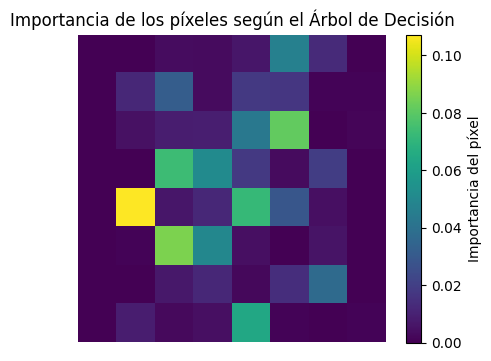

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

importancias = clf.feature_importances_
print(f"Importancia de las features (shape): {importancias.shape}")
importancias_matriz = importancias.reshape(8,8)

plt.figure(figsize=(5, 4))
im = plt.imshow(importancias_matriz, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Importancia del píxel')
plt.title('Importancia de los píxeles según el Árbol de Decisión')
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

Veamos ejemplos de cómo son las imágenes en esos pixeles. Nos restringimos a importancias mayores a cierto umbral  

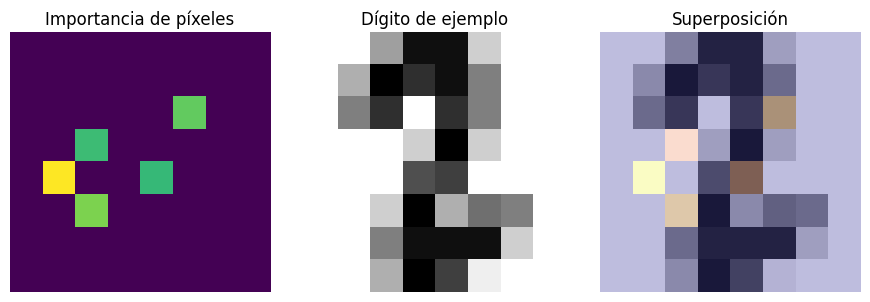

In [83]:
idx = 942 # 897 159
ejemplo = X_train[idx].reshape(8, 8)

filtered_importancias = np.where(importancias_matriz>0.065,importancias_matriz,np.zeros_like(importancias_matriz))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

# Mapa de importancia
ax1.imshow(filtered_importancias, cmap='viridis', interpolation='nearest')
ax1.set_title('Importancia de píxeles')
ax1.axis('off')

# Dígito de ejemplo
ax2.imshow(ejemplo, cmap='gray_r', interpolation='nearest')
ax2.set_title('Dígito de ejemplo')
ax2.axis('off')

# Superposición
ax3.imshow(filtered_importancias, cmap='plasma', alpha=0.75, interpolation='nearest')
ax3.imshow(ejemplo, cmap='gray_r', alpha=0.65, interpolation='nearest')
ax3.set_title('Superposición')
ax3.axis('off')

plt.tight_layout()
plt.show()

#### Efecto de la normalización

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# ----- Normalizando ----
pl = Pipeline([('scl',MinMaxScaler()),
               ('clf',DecisionTreeClassifier())])
pl.fit(X_train,y_train)
print(f"Accuracy de prueba (Normalizando): {pl.score(X_test,y_test)}")

# ---- Sin normalizar ----
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print(f"Accuracy de prueba (Sin normalizar): {clf.score(X_test,y_test)}")


Accuracy de prueba (Normalizando): 0.8444444444444444
Accuracy de prueba (Sin normalizar): 0.8481481481481481


Con la ayuda de gridsearch, veamos cuál es la mejor profundidad que podemos obtener

In [85]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = {'max_depth': depths})
gs.fit(X_train,y_train)
print(gs.best_params_)
print(f"Accuracy de prueba con el mejor clasificador: {gs.best_estimator_.score(X_test,y_test)}")

{'max_depth': 9}
Accuracy de prueba con el mejor clasificador: 0.8240740740740741


#### Comparación con SVM

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

num_pruebas = 7

dt_times = []
for j in range(num_pruebas):
    start = time.time()
    clf = DecisionTreeClassifier(max_depth=None)
    clf = clf.fit(X_train,y_train)
    end = time.time()
    dt_times.append(end-start)
print(f"Tiempo promedio de ejecución DT: {np.mean(dt_times)}")

svm_times = []
for j in range(num_pruebas):
    start = time.time()
    clf = SVC(kernel='linear')
    clf = clf.fit(X_train,y_train)
    end = time.time()
    svm_times.append(end-start)
print(f"Tiempo promedio de ejecución SVM: {np.mean(svm_times)}")


Tiempo promedio de ejecución DT: 0.07099570546831403
Tiempo promedio de ejecución SVM: 0.07507262911115374


¿Cómo se compara el rendimiento con un SVM?

In [87]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = SVC()
clf = clf.fit(X_train,y_train)
print(f"Accuracy de prueba (SVM): {clf.score(X_test,y_test)}")

print(f"Accuracy de prueba (DT): {gs.best_estimator_.score(X_test,y_test)}")

Accuracy de prueba (SVM): 0.9888888888888889
Accuracy de prueba (DT): 0.8240740740740741


### Conclusión

Ventajas:

* Es robusto ante la falta de normalización
* Es rápido

Desventajas:

* Es susceptible a perturbaciones (ruido)
* Es susceptible a overfitting

## Clasificador 2: Random Forest

<img src="https://drive.google.com/uc?id=1vR5_xEzC4l3aWURPCNkwlceDzJ7cbh-s" alt="random forest" width="500">

Ahora experimentemos con un clasificador [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Este es un clasificador **ensamble**, es decir, se compone de varios clasificadores árbol de decisión, cada uno emitiendo un voto sobre la clasificación.


### Ejemplo 1

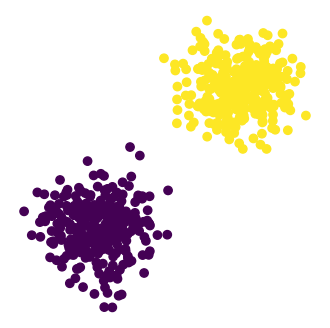

In [125]:
plt.figure(figsize=(4,4))
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.axis('off')
plt.axis('equal')
plt.show()

Entrenamos y evaluamos un modelo de Random Forest, dado que los datos son linealmente separables, esperamos obtener 100% en las métricas

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


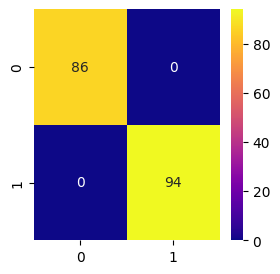

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=101) # 70% training and 30% test

clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Además, visalicemos la frontera de decisión

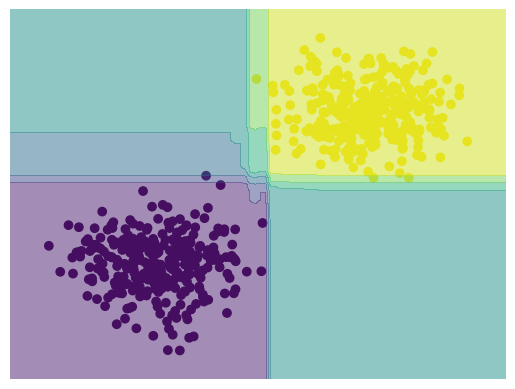

In [128]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], c=y1) # Hacemos el scatter con los puntos que queremos mostrar
DecisionBoundaryDisplay.from_estimator(clf, X1,
                                      ax=ax, alpha=0.5) # Mostramos la frontera de decisión encima
ax.axis('off')
plt.show()

### Ejemplo 2

Primero, hagamos la clasificación incial, con los hiperparámetros por defecto

Accuracy: 0.969
Recall: 0.969
Precision: 0.97
F1 score: 0.969


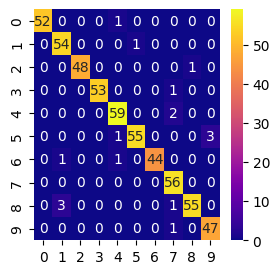

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt


X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

🔵 ¿Qué pasa si lo corremos otra vez? ¿Obtenemos el mismo resultado? Cambia si fijamos el `random_state`?

Veamos el efecto de la normalización (re-escalamiento)

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pl = Pipeline([
            ('scl',StandardScaler()),
            # ('scl',MinMaxScaler()),
            ('clf',RandomForestClassifier(n_estimators=50))])
pl.fit(X_train,y_train)
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

# plt.figure(figsize=(3,3))
# cm = confusion_matrix(y_test,y_pred)
# s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
# plt.show()

Accuracy: 0.98
Recall: 0.98
Precision: 0.981
F1 score: 0.98


Observemos que tenemos una mayor *estabilidad* ante los hiperparámetros. Esto se debe a la naturaleza colectiva de la predicción.

In [121]:
from ipywidgets import interact
from sklearn.metrics import classification_report

depths = list(range(2,14)) + [None]

@interact(n_estimators=[10, 50, 100, 200], max_depth=depths)
def train_rf(n_estimators=100, max_depth=5):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(y_test,y_pred)
    s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
    plt.show()

interactive(children=(Dropdown(description='n_estimators', index=2, options=(10, 50, 100, 200), value=100), Dr…

Veamos el comportamiento del accuracy en el conjunto de prueba, vemos que se observa un comportamiento más robusto ante el overfitting. Ahora el parámetro dominante respecto a la complejidad es el `n_estimators`

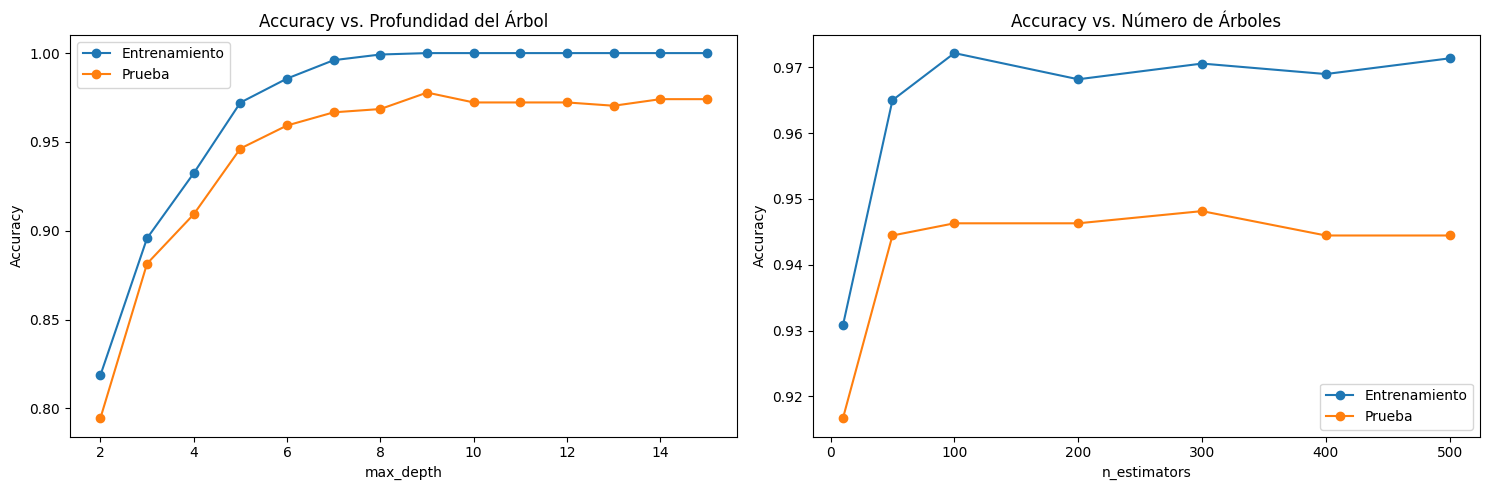

In [135]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Configuración de la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Gráfico 1: Accuracy vs max_depth (original) ---
depths = list(range(2, 16))
accs_train = []
accs_test = []

for d in depths:
    clf = RandomForestClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    accs_train.append(clf.score(X_train, y_train))
    accs_test.append(clf.score(X_test, y_test))

ax1.plot(depths, accs_train, label='Entrenamiento', marker='o')
ax1.plot(depths, accs_test, label='Prueba', marker='o')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs. Profundidad del Árbol')
ax1.legend()

# --- Gráfico 2: Accuracy vs n_estimators (nuevo) ---
n_estimators = [10, 50, 100, 200, 300, 400, 500]
accs_train_est = []
accs_test_est = []

for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n, random_state=42, max_depth=5)
    clf.fit(X_train, y_train)
    accs_train_est.append(clf.score(X_train, y_train))
    accs_test_est.append(clf.score(X_test, y_test))

ax2.plot(n_estimators, accs_train_est, label='Entrenamiento', marker='o')
ax2.plot(n_estimators, accs_test_est, label='Prueba', marker='o')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs. Número de Árboles')
ax2.legend()

plt.tight_layout()
plt.show()

Ahora veamos la importancia de las features

Tamaño del conjunto de entrenamiento: (1257, 64)
Importancia de las features (shape): (64,)


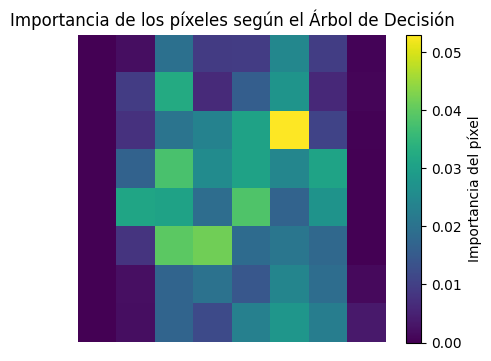

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")

clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)

# ------ IMPORTANCIA DE LAS FEATURES ---------
importancias = clf.feature_importances_
# ---------------------------------------------
print(f"Importancia de las features (shape): {importancias.shape}")
importancias_matriz = importancias.reshape(8,8)

plt.figure(figsize=(5, 4))
im = plt.imshow(importancias_matriz, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Importancia del píxel')
plt.title('Importancia de los píxeles según el Árbol de Decisión')
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

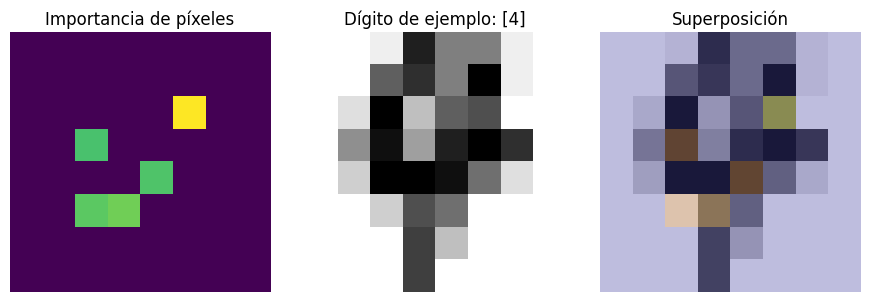

In [142]:
idx = np.random.choice(X_train.shape[0],size=1)
ejemplo = X_train[idx].reshape(8, 8)

k = 6
topk_values = np.partition(importancias_matriz.flatten(), -k)[-k:]
umbral = np.min(topk_values)
filtered_importancias = np.where(importancias_matriz>umbral,importancias_matriz,np.zeros_like(importancias_matriz))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))

# Mapa de importancia
ax1.imshow(filtered_importancias, cmap='viridis', interpolation='nearest')
ax1.set_title('Importancia de píxeles')
ax1.axis('off')

# Dígito de ejemplo
ax2.imshow(ejemplo, cmap='gray_r', interpolation='nearest')
ax2.set_title(f'Dígito de ejemplo: {y_train[idx]}')
ax2.axis('off')

# Superposición
ax3.imshow(filtered_importancias, cmap='plasma', alpha=0.75, interpolation='nearest')
ax3.imshow(ejemplo, cmap='gray_r', alpha=0.65, interpolation='nearest')
ax3.set_title('Superposición')
ax3.axis('off')

plt.tight_layout()
plt.show()

### Conclusión

Ventajas:

* Es robusto ante la falta de normalización
* Es robusto ante el overfitting
* Maneja bien features categóricas y numéricas sin preprocesamiento complejo
* Funciona bien con datasets grandes y alta dimensionalidad
* Proporciona importancia de features incorporada
* Maneja automáticamente valores faltantes

Desventajas:

* Es lento (especialmente con muchos árboles o datos de alta dimensión)
* Requiere más memoria que modelos lineales
* Menos interpretable que modelos simples
* Puede ser demasiado conservativo con datos muy raros o novedosos
* Difícil de implementar en sistemas en tiempo real estricto

## Clasificador 3: Regresión Logística


Ahora exploremos el clasificador [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Ejemplo 1

Una vez más, en este ejemplo veremos el uso general y la forma de la frontera de decisión.

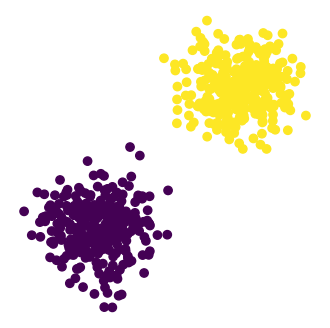

In [146]:
plt.figure(figsize=(4,4))
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.axis('off')
plt.axis('equal')
plt.show()

Entrenamos y evaluamos un modelo de Regresión Logística, dado que los datos son linealmente separables, esperamos obtener 100% en las métricas

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


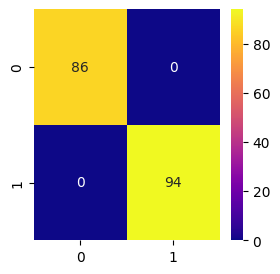

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=101) # 70% training and 30% test

clf = LogisticRegression()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

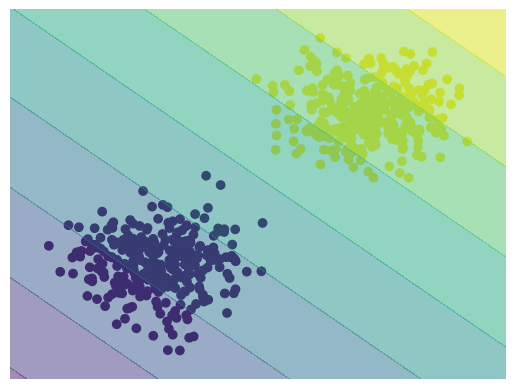

In [148]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], c=y1) # Hacemos el scatter con los puntos que queremos mostrar
DecisionBoundaryDisplay.from_estimator(clf, X1,
                                      ax=ax, alpha=0.5) # Mostramos la frontera de decisión encima
ax.axis('off')
plt.show()

### Ejemplo 2

Primero, hagamos la clasificación incial, con los hiperparámetros por defecto

Accuracy: 0.965
Recall: 0.966
Precision: 0.967
F1 score: 0.966


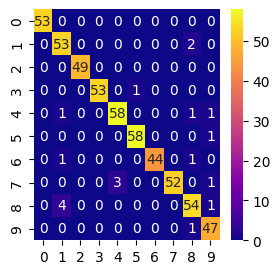

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt


X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = LogisticRegression()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

En general, en la regresión logística, es importante el re-escalamiento

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pl = Pipeline([
            # ('scl',StandardScaler()),
            ('scl',MinMaxScaler()),
            ('clf',LogisticRegression())])
pl.fit(X_train,y_train)
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

# plt.figure(figsize=(3,3))
# cm = confusion_matrix(y_test,y_pred)
# s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
# plt.show()

Accuracy: 0.97
Recall: 0.971
Precision: 0.973
F1 score: 0.972


In [154]:
from ipywidgets import interact
from sklearn.metrics import classification_report

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
pens = ['l1', 'l2', None]

@interact(C=Cs, penalty=pens)
def train_rf(penalty=None, C=1):
    model = LogisticRegression(penalty=penalty,
                               C=C,
                               solver='saga')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(y_test,y_pred)
    s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
    plt.show()

interactive(children=(Dropdown(description='penalty', options=('l1', 'l2', None), value=None), Dropdown(descri…

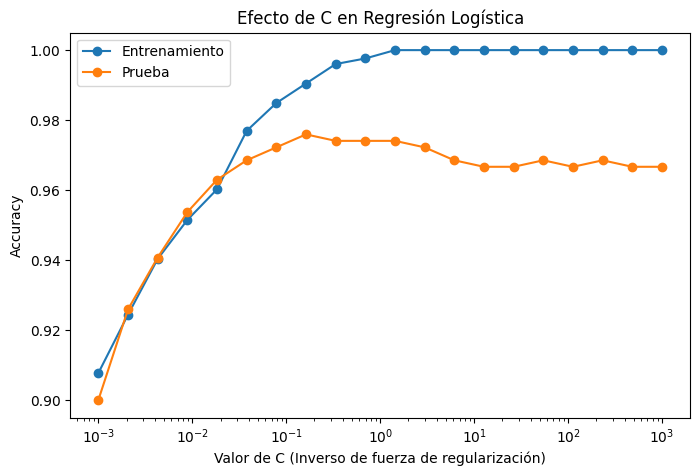

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # ¡Importante para LogReg!

# Generar datos de ejemplo (si no los tienes ya)
# X, y = ...

# Estandarizar features (crucial para regularización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rango de valores de C (usamos escala logarítmica)
C_values = np.logspace(-3, 3, 20)  # De 0.001 a 1000

accs_train = []
accs_test = []

for C in C_values:
    model = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    accs_train.append(model.score(X_train_scaled, y_train))
    accs_test.append(model.score(X_test_scaled, y_test))

# Gráfico
plt.figure(figsize=(8, 5))
plt.semilogx(C_values, accs_train, label='Entrenamiento', marker='o')
plt.semilogx(C_values, accs_test, label='Prueba', marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Efecto de C en Regresión Logística')
plt.legend()
plt.show()

Importancia de las features (shape): (64,)


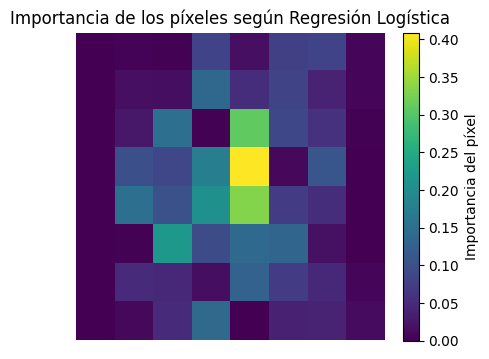

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


pl = Pipeline([
            ('scl',StandardScaler()),
            ('clf',LogisticRegression(C=0.001))])
pl.fit(X_train,y_train)

# ------ IMPORTANCIA DE LAS FEATURES ---------
importancias = np.abs(clf.coef_[0])  # Tomamos los valores absolutos de los coeficientes
# ---------------------------------------------
print(f"Importancia de las features (shape): {importancias.shape}")
importancias_matriz = importancias.reshape(8,8)

plt.figure(figsize=(5, 4))
im = plt.imshow(importancias_matriz, cmap='viridis', interpolation='nearest')
plt.colorbar(im, label='Importancia del píxel')
plt.title('Importancia de los píxeles según Regresión Logística')
plt.axis('off')
plt.show()

### Conclusión

Ventajas:

- **Interpretabilidad**: Los coeficientes tienen una explicación clara (cambio en el log-odds por unidad de cambio en el feature).
- **Eficiencia computacional**: Rápido en entrenamiento y predicción, incluso con datasets grandes.
- **Probabilidades naturales**: Devuelve probabilidades calibradas (útil para decisiones con umbrales).
- **Regularización incorporada**: Evita overfitting con L1/L2 (controlable con `C`).
- **Funciona bien con datos linealmente separables**: Óptimo cuando la relación es aproximadamente lineal.

Desventajas:

- **Sensibilidad a multicolinealidad**: Los coeficientes se vuelven inestables o poco interpretables.
- **No captura relaciones no lineales**: Requiere transformaciones manuales de features (ej.: polinomios).
- **Supuesto linealidad**: Asume una relación lineal entre features y log-odds (limitante en problemas complejos).
- **Dependencia del escalado**: Requiere features estandarizadas para regularización efectiva.
- **Problemas con clases desbalanceadas**: Tiende a favorecer la clase mayoritaria (necesita ajustes como `class_weight`).

## Clasificador 4: K-Vecinos más cercanos

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Ejemplo 1

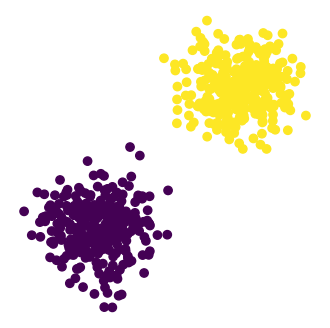

In [158]:
plt.figure(figsize=(4,4))
plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.axis('off')
plt.axis('equal')
plt.show()

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


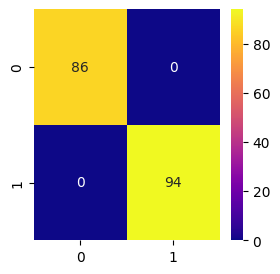

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=101) # 70% training and 30% test

clf = KNeighborsClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

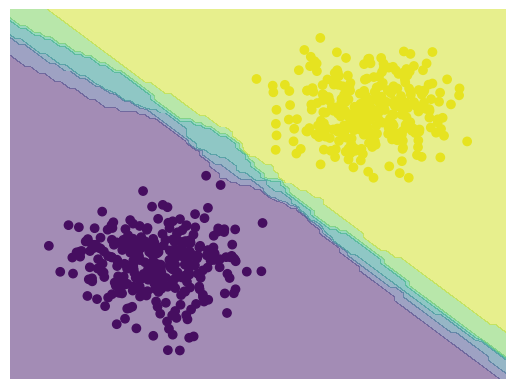

In [160]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], c=y1) # Hacemos el scatter con los puntos que queremos mostrar
DecisionBoundaryDisplay.from_estimator(clf, X1,
                                      ax=ax, alpha=0.5) # Mostramos la frontera de decisión encima
ax.axis('off')
plt.show()

### Ejemplo 2

Accuracy: 0.987
Recall: 0.988
Precision: 0.987
F1 score: 0.987


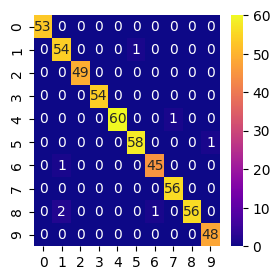

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt


X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = KNeighborsClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Le afectan las escalas diferentes entre features, en este caso no tenemos ese fenomeno

Accuracy: 0.974
Recall: 0.975
Precision: 0.976
F1 score: 0.975


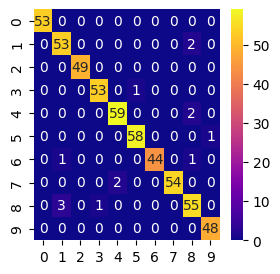

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pl = Pipeline([
            ('scl',StandardScaler()),
            # ('scl',MinMaxScaler()),
            ('clf',LogisticRegression())])
pl.fit(X_train,y_train)
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")
print(f"F1 score: {round(f1_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

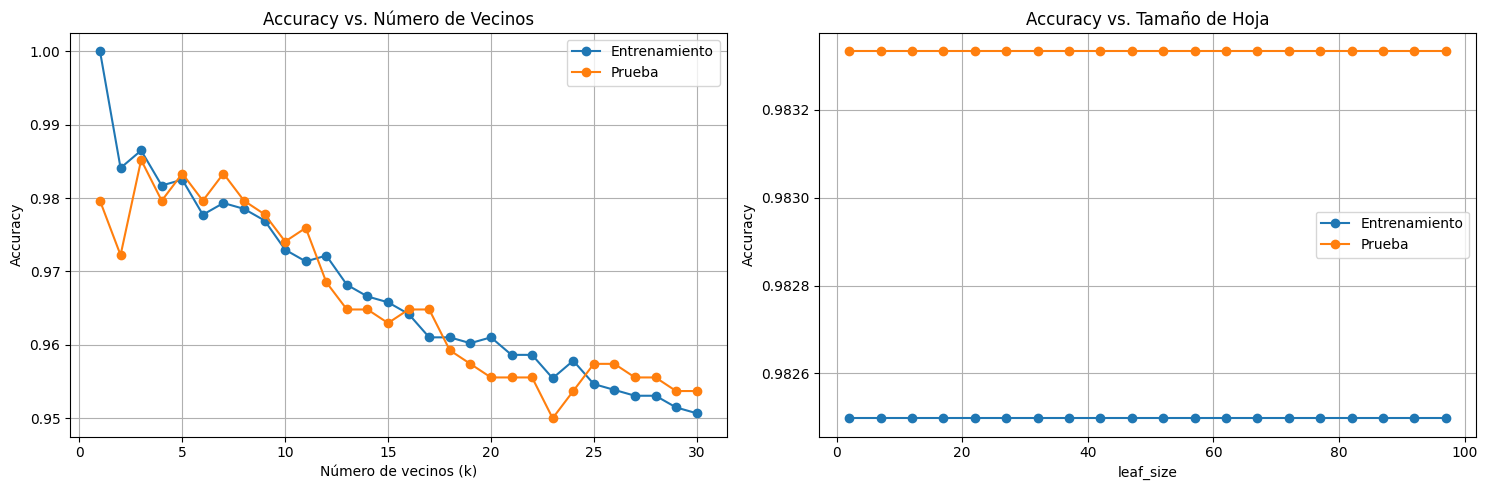

In [166]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Escalar los datos (importante para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuración de la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Gráfico 1: Accuracy vs número de vecinos (k) ---
k_values = list(range(1, 31))  # Probamos k de 1 a 30
accs_train_k = []
accs_test_k = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accs_train_k.append(knn.score(X_train_scaled, y_train))
    accs_test_k.append(knn.score(X_test_scaled, y_test))

ax1.plot(k_values, accs_train_k, label='Entrenamiento', marker='o')
ax1.plot(k_values, accs_test_k, label='Prueba', marker='o')
ax1.set_xlabel('Número de vecinos (k)')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs. Número de Vecinos')
ax1.legend()
ax1.grid(True)

# --- Gráfico 2: Accuracy vs leaf_size ---
leaf_sizes = list(range(2, 101, 5))  # De 5 a 100 en pasos de 5
accs_train_leaf = []
accs_test_leaf = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)  # k fijo=5 para este análisis
    knn.fit(X_train_scaled, y_train)
    accs_train_leaf.append(knn.score(X_train_scaled, y_train))
    accs_test_leaf.append(knn.score(X_test_scaled, y_test))

ax2.plot(leaf_sizes, accs_train_leaf, label='Entrenamiento', marker='o')
ax2.plot(leaf_sizes, accs_test_leaf, label='Prueba', marker='o')
ax2.set_xlabel('leaf_size')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs. Tamaño de Hoja')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

**⚠ ¡Ahora no tenemos importancia de features!**

### Conclusión

Ventajas:

* Simple de entender
* No requiere fase de entrenamiento (modelo "perezoso")
* Adaptable fácilmente a nuevos datos
* Funciona bien con datos no lineales
* Pocos hiperparámetros a ajustar (principalmente k y métrica de distancia)

Desventajas:

* Sensible a la escala de los features (requiere normalización)
* Costoso computacionalmente en predicción (especialmente con muchos datos)
* Sensible a features irrelevantes o ruidosos
* Dificultad para elegir k óptimo
* Problemas con datos de alta dimensionalidad (maldición de la dimensionalidad)
* No proporciona importancia de features intrínseca

In [167]:
# En una celda de Colab:
!jupyter nbconvert --to notebook --ClearMetadataPreprocessor.enabled=True tu_notebook.ipynb

[NbConvertApp] WARNING | pattern 'tu_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   